## Problem Statement :
### A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


## Approach:
##### We are concerned about determining the driver variable for show viewership. This is the case of pridiction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

##### First we will list down the potential reasons for the decline in viewershp.

##### The potential reasons could be:

##### 1.Decline in the number of people coming to the platform
##### 2.Fewer people watching the video
##### 3.A Decrease in marketing spend?
##### 4.Competitive shows, e.g. cricket/ IPL
##### 5.Special holidays
##### 6.Twist in the story

## Data
##### We have been given data for the period of 1 March 2017 to 19 May 2017.
##### With Columns as
##### Views_show : Number of times the show was viewed
##### Visitors : Number of visitors who browsed the platform, but not necessarily watched a video.
##### Views_platform : Number of times a video was viewed on the platform
##### Ad_impression : Proxy for marketing budget. Represents number of impressions generated by ads
##### Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't
##### Character_A : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [1]:
#import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("mediacompany.csv") # read the csv format file
df.drop(["Unnamed: 7"], axis = 1, inplace = True) # drop the column,axis=1 is for column,axis=0 for row,inplace=true is to save the changed data

In [5]:
df["Date"] = pd.to_datetime(df.Date).dt.date # to convert the date column into yyyy-mon-date format
df.head()#to show top five rows of data

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  
0                    0            0  
1                    0            0  
2                    0            0  
3                    1            0  
4                    0            0

In [7]:
from datetime import date #import datetime package

d0 = date(2017, 2, 28) #fixed the date 28 feb
d1 = df.Date #read the date column
delta = d1 - d0 # to find the days
df["day"] = delta #create new column of 'day' and assign the value of delta
df.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A    day  
0                    0            0 1 days  
1                    0            0 2 days  
2                    0            0 3 days  
3                    1            0 4 days  
4                    0            0 5 days

In [8]:
df["day"] = df.day.astype(str) #convert to string
df["day"] = df.day.map(lambda x: x[0:2]) #apply lambda function to remove days string
df["day"] = df.day.astype(int) #convert to int

In [9]:
df.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  day  
0                    0            0    1  
1                    0            0    2  
2                    0            0    3  
3                    1            0    4  
4                    0            0    5

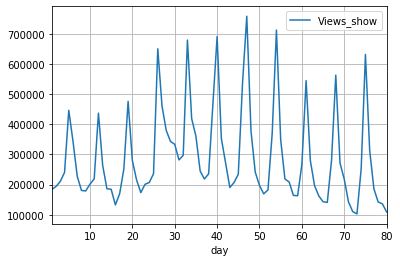

In [10]:
df.plot.line("day", "Views_show") #for plotting
plt.grid() #grid means backward blacklines in graph

In [11]:
X = df[["Visitors", "Character_A"]] #save these columns in x
Y = df["Views_show"] # save this column in y

In [15]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(Y,X).fit()
lm_1.summary()

c:\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           1.78e-08
Time:                        21:09:13   Log-Likelihood:                -1050.5
No. Observations:                  80   AIC:                             2107.
Df Residuals:                      77   BIC:                             2114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.795e+05   1.05e+05     -2.672      0.009   -4.88e+05   -7.12e+04
Visitors        0.3142      0.062      5.056      0.000       0.190       0.438
Character_A  9.475e+04   2.95e+04      3.213      0.002     3.6e+04    1.53e+05
==============================================================================
Omnibus:                        5.028   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.024
Skew:                           0.579   Prob(JB):                       0.0811
Kurtosis:                       2.595   Cond. No.                     1.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df["weekday"] = (df["day"]+3)%7 # find the weekday
df.weekday.replace(0, 7, inplace = True) #replace the 0 value to 7 in weekday column
df.weekday.astype(int) #convert to int
df.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  day  weekday  
0                    0            0    1        4  
1                    0            0    2        5  
2                    0            0    3        6  
3                    1            0    4        7  
4                    0            0    5        1

In [17]:
df.weekday.replace(2, 0, inplace = True)
df.weekday.replace(3, 0, inplace = True)
df.weekday.replace(4, 0, inplace = True)
df.weekday.replace(5, 0, inplace = True)
df.weekday.replace(6, 0, inplace = True)
df.weekday.replace(7, 1, inplace = True)

In [18]:
df.rename(columns={"weekday":"weekend"}, inplace=True) #rename the column, inplace=true to save the updated dataset

In [19]:
df.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  day  weekend  
0                    0            0    1        0  
1                    0            0    2        0  
2                    0            0    3        0  
3                    1            0    4        1  
4                    0            0    5        1

In [30]:
X = df[["Visitors", "Character_A", "weekend"]]
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(Y, X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.53e-14
Time:                        12:35:57   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X = df[["Character_A", "weekend", "Ad_impression"]]
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(Y, X).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.05e-26
Time:                        12:40:50   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred = lm_3.predict(X) # making prediction

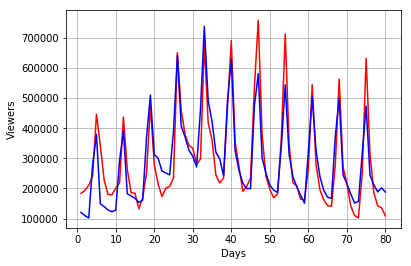

In [75]:
plt.plot(df.day, Y, color = "red", label = "Actual") # here x is df.day column
plt.plot(df.day, pred, color = "blue", label = "Predicted")
plt.xlabel("Days")  # name of x axis
plt.ylabel("Viewers") # name of y axis
plt.grid()

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # split the dataset into test size is 30% and train is 70% of data
model = LinearRegression() #apply linear regression model
model.fit(X_train, Y_train) #fit the x_train and y_train dataset in linearregression algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
model.score(X_test, Y_test) # it is to check the accuracy after train the model

0.8236350533008667

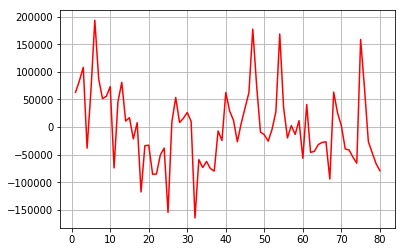

In [79]:
plt.plot(df.day, (Y-pred), color = "red", label = "Error")
plt.grid()

# Conclusion:
#### The company launched a particular show, the problem is initially the TRP for that show was very good but suddenly the company notice the decline in the TRP for that particular show. They were interested to find out that what can be the possible reason due to which their show viewership has been decreased and what action they can take to fix that problem. This is a multiple regression model case and we have to build a perfect model to know what are the particular factors/columns which are impacting the viewership and to predict its views in the future.